# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
def bayes_rule(previos, probables):
    marg = sum(np.multiply(previos, probables))
    post = np.divide(np.multiply(previos, probables), marg)
    return post

In [3]:
previos = [0.5, 0.5]
probables = [0.75, 0.5]

posteriores = bayes_rule(previos, probables)

"Galleta de Vainilla", posteriores[0]

('Galleta de Vainilla', 0.6)

What is the probability that it came from Bowl 2?

In [4]:
"Galleta de Vainilla", posteriores[1]

('Galleta de Vainilla', 0.4)

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [5]:
probables = [0.25, 0.5]

posteriores = bayes_rule(previos, probables)

print("Galleta de chocolate en el tazon 1", posteriores[0])
print("Galleta de chocolate en el tazon 1", posteriores[1])

Galleta de chocolate en el tazon 1 0.3333333333333333
Galleta de chocolate en el tazon 1 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [6]:
previos = [0.5, 0.5]
probables = [(0.2 * 0.2), (0.14 * 0.1)]

posteriores = bayes_rule(previos, probables)

"Dulce amarillo de bolsa 1", posteriores[0]

('Dulce amarillo de bolsa 1', 0.7407407407407408)

What is the probability that the yellow candy came from Bag 2?

In [7]:
"Dulce amarillo de bolsa 2", posteriores[1]

('Dulce amarillo de bolsa 2', 0.25925925925925924)

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [8]:
probables = [(0.14 * 0.1), (0.2 * 0.2)]

posteriores = bayes_rule(previos, probables)

print("Dulce verde en bolsa 1", posteriores[0])
print("Dulce verde en bolsa 2", posteriores[1])

Dulce verde en bolsa 1 0.25925925925925924
Dulce verde en bolsa 2 0.7407407407407408


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [9]:
previos = [1/3, 1/3, 1/3]
probables = [1/2, 0, 1]

In [13]:
posteriores = bayes_rule(previos, probables)

In [14]:
print('Probability of winning if you stick with Door A:', posteriores[0])
print('Probability of winning if you switch to Door C:', posteriores[2])

Probability of winning if you stick with Door A: 0.3333333333333333
Probability of winning if you switch to Door C: 0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

<AxesSubplot:>

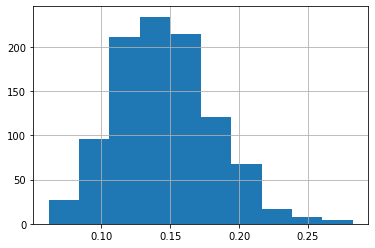

In [17]:
n_draws = 100000
previos = pd.Series(np.random.uniform(0, 1, size=n_draws))

def generative_model(param):
    resultado = np.random.binomial(100, param)
    return resultado

sim_data = list()

for p in previos:
    sim_data.append(generative_model(p))

observed = 14
posteriores = previos[list(map(lambda x: x == observed, sim_data))]
posteriores.hist()

Produce a set of descriptive statistics for the posterior distribution.

In [18]:
posteriores.describe()

count    1001.000000
mean        0.146055
std         0.035757
min         0.061703
25%         0.119626
50%         0.144000
75%         0.167694
max         0.282625
dtype: float64

What is the 90% credible interval range?

In [19]:
print(posteriores.quantile(.05), '|', posteriores.quantile(.95))

0.09270010074653678 | 0.20822255516286403


What is the Maximum Likelihood Estimate?

In [22]:

rounded = posteriores.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Probabilidad maxima', mode, '|',probability)

Probabilidad maxima 0.16 | 0.1088911088911089
